In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
data = pd.read_csv("top_rich2024.csv")


   Rank             Name Total net worth  $ Last change  $ YTD change  \
0     1        Elon Musk            $447B        +$62.8B       +$218B   
1     2       Jeff Bezos            $249B        +$4.65B      +$72.1B   
2     3  Mark Zuckerberg            $224B        +$4.58B      +$95.5B   
3     4    Larry Ellison            $198B        +$1.63B      +$75.3B   
4     5  Bernard Arnault            $181B        +$1.32B      -$26.4B   

  Country / Region    Industry  
0    United States  Technology  
1    United States  Technology  
2    United States  Technology  
3    United States  Technology  
4           France    Consumer  


In [17]:
# 查看数据前几行
print(data.head())

# 查看数据结构和基本信息
print(data.info())

# 查看数据统计信息
print(data.describe())


   Rank             Name Total net worth  $ Last change  $ YTD change  \
0     1        Elon Musk            $447B        +$62.8B       +$218B   
1     2       Jeff Bezos            $249B        +$4.65B      +$72.1B   
2     3  Mark Zuckerberg            $224B        +$4.58B      +$95.5B   
3     4    Larry Ellison            $198B        +$1.63B      +$75.3B   
4     5  Bernard Arnault            $181B        +$1.32B      -$26.4B   

  Country / Region    Industry  
0    United States  Technology  
1    United States  Technology  
2    United States  Technology  
3    United States  Technology  
4           France    Consumer  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              500 non-null    int64 
 1    Name             500 non-null    object
 2   Total net worth   500 non-null    object
 3   $ Last change     500 no

In [19]:
print(data.isnull().sum())  # 检查每列缺失值数量
print(data.duplicated().sum())  # 检查重复行的数量


Rank                0
 Name               0
Total net worth     0
$ Last change       0
$ YTD change        0
Country / Region    0
Industry            0
dtype: int64
0


In [24]:
print(data.columns)
# 去除列名中的前后空格
data.columns = data.columns.str.strip()

# 再次打印列名以确认清理结果
print(data.columns)


Index(['Rank', ' Name', 'Total net worth ', '$ Last change ', '$ YTD change',
       'Country / Region', 'Industry'],
      dtype='object')
Index(['Rank', 'Name', 'Total net worth', '$ Last change', '$ YTD change',
       'Country / Region', 'Industry'],
      dtype='object')


In [52]:
print(top_country_industries)
print(top_country_industries.dtypes)
# 清理 "Total net worth" 列，去掉 '$', ',' 和 'B' 等字符，并转换为浮点型
data['Total net worth'] = (
    data['Total net worth']
    .str.replace('[\$,B]', '', regex=True)  # 移除 $ 和 B
    .str.replace(',', '')  # 移除逗号
    .astype(float)  # 转换为浮点型
)



Industry
Energy                           $97.1B
Diversified                      $9.82B
Industrial     $79.3B$41.4B$21.0B$8.82B
Name: Total net worth, dtype: object
object


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\zhoul\AppData\Local\Temp\ipykernel_24540\2176369168.py:6: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('[\$,B]', '', regex=True)  # 移除 $ 和 B


In [53]:
print(data['Total net worth'].head())
print(data['Total net worth'].dtype)  # 应显示 float64


0    447.0
1    249.0
2    224.0
3    198.0
4    181.0
Name: Total net worth, dtype: float64
float64


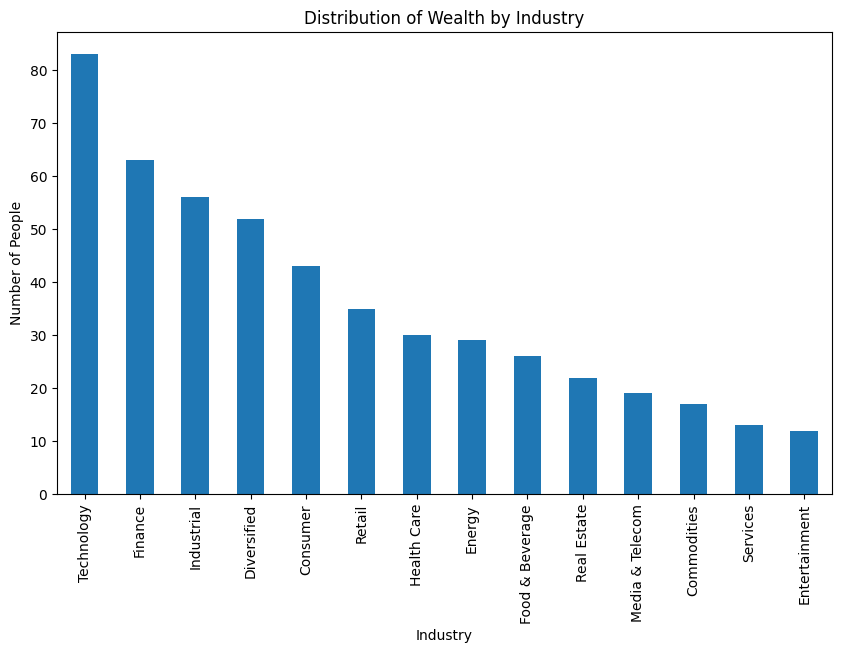

In [27]:
# 行业分布
industry_counts = data['Industry'].value_counts()

# 绘制行业分布柱状图
industry_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Distribution of Wealth by Industry")
plt.xlabel("Industry")
plt.ylabel("Number of People")
plt.show()


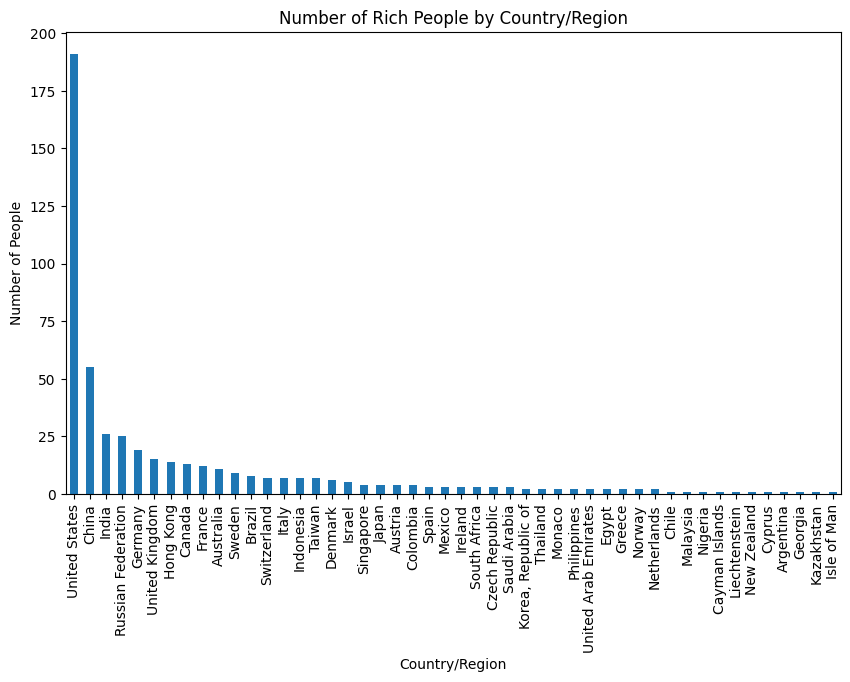

In [28]:
# 国家/地区分布
country_counts = data['Country / Region'].value_counts()

# 绘制国家分布柱状图
country_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Rich People by Country/Region")
plt.xlabel("Country/Region")
plt.ylabel("Number of People")
plt.show()


Industry
Technology    2443.36
Finance        646.21
Retail         520.60
Name: Total net worth, dtype: float64


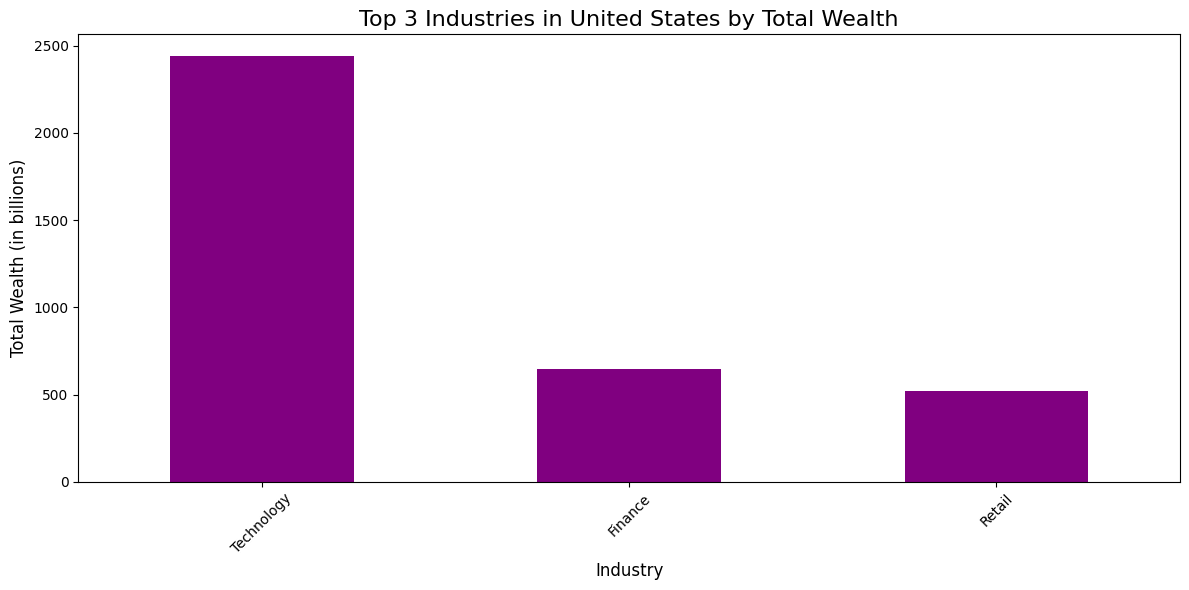

In [54]:
# 找到总财富最高的国家
top_country = data.groupby('Country / Region')['Total net worth'].sum().idxmax()

# 筛选该国家的数据
top_country_data = data[data['Country / Region'] == top_country]

# 按行业分组，计算总财富
top_country_industries = (
    top_country_data.groupby('Industry')['Total net worth']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

# 确认分组结果
print(top_country_industries)

# 绘制柱状图
plt.figure(figsize=(12, 6))
top_country_industries.plot(kind='bar', color='purple')
plt.title(f"Top 3 Industries in {top_country} by Total Wealth", fontsize=16)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Total Wealth (in billions)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


Top 5 Industries with the Best Average Rank:
Industry
Technology     223.783133
Retail         225.114286
Energy         227.689655
Commodities    245.529412
Real Estate    248.772727
Name: Rank, dtype: float64

Bottom 5 Industries with the Worst Average Rank:
Industry
Services           260.307692
Food & Beverage    263.884615
Entertainment      286.083333
Media & Telecom    290.052632
Health Care        293.533333
Name: Rank, dtype: float64


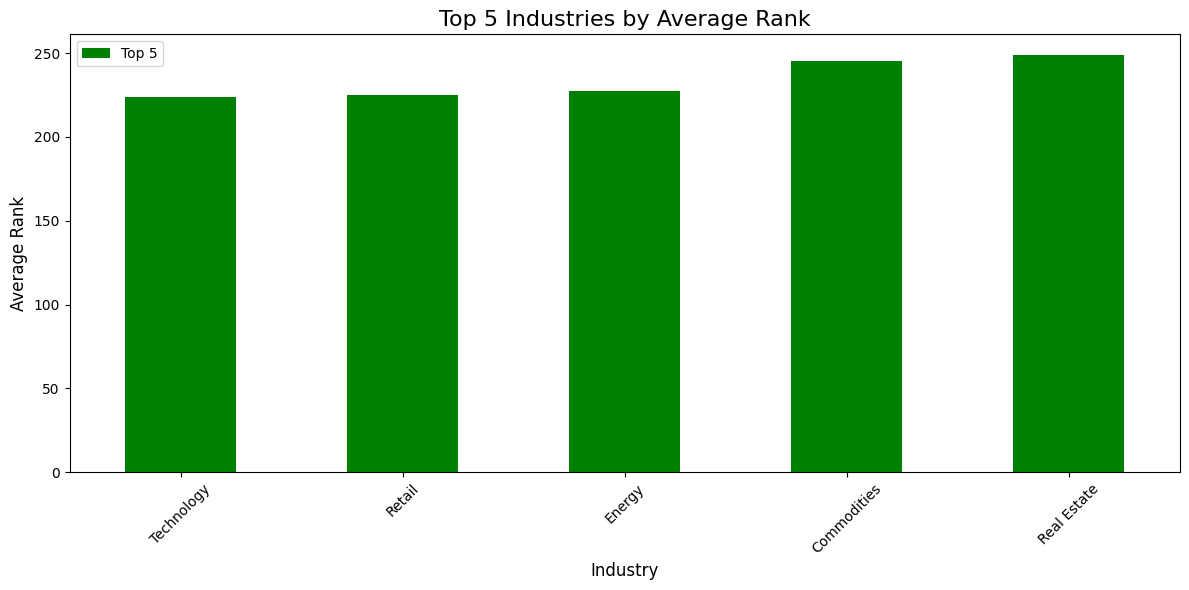

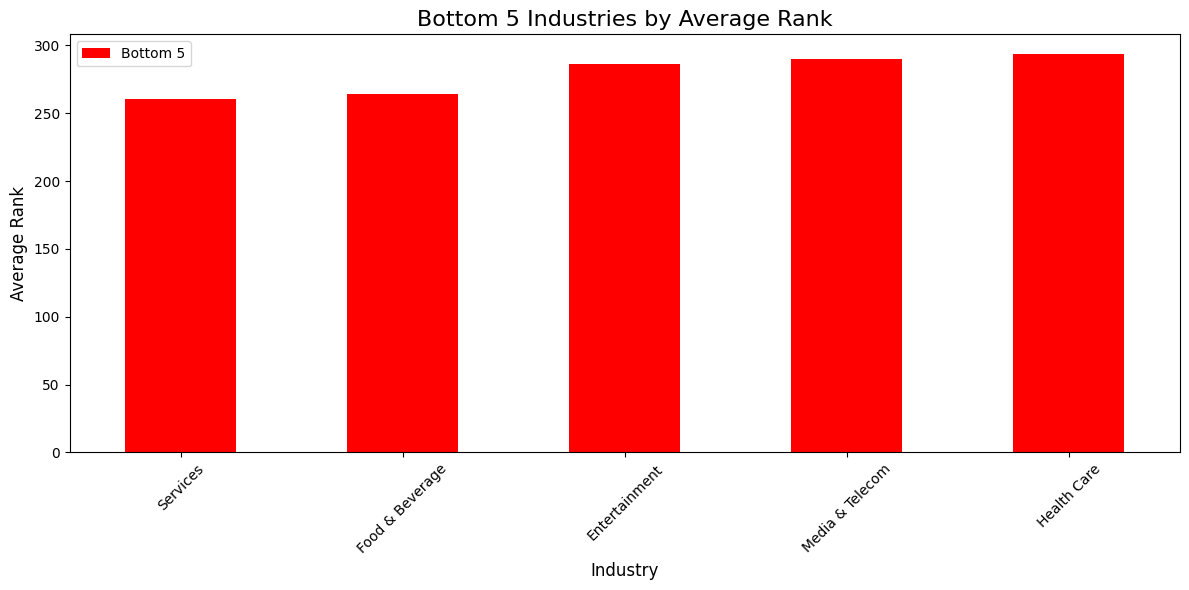

In [61]:
# 按行业计算平均排名
industry_avg_rank = data.groupby('Industry')['Rank'].mean().sort_values()

# 打印前5和后5的行业平均排名
print("Top 5 Industries with the Best Average Rank:")
print(industry_avg_rank.head(5))

print("\nBottom 5 Industries with the Worst Average Rank:")
print(industry_avg_rank.tail(5))

# 绘制前5和后5行业的柱状图
plt.figure(figsize=(12, 6))
industry_avg_rank.head(5).plot(kind='bar', color='green', label='Top 5')
plt.title("Top 5 Industries by Average Rank", fontsize=16)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Average Rank", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
industry_avg_rank.tail(5).plot(kind='bar', color='red', label='Bottom 5')
plt.title("Bottom 5 Industries by Average Rank", fontsize=16)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Average Rank", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


Industry Distribution in China:
Industry
Technology         12
Industrial         12
Consumer            9
Health Care         6
Finance             4
Diversified         3
Food & Beverage     3
Energy              2
Retail              1
Services            1
Real Estate         1
Entertainment       1
Name: count, dtype: int64


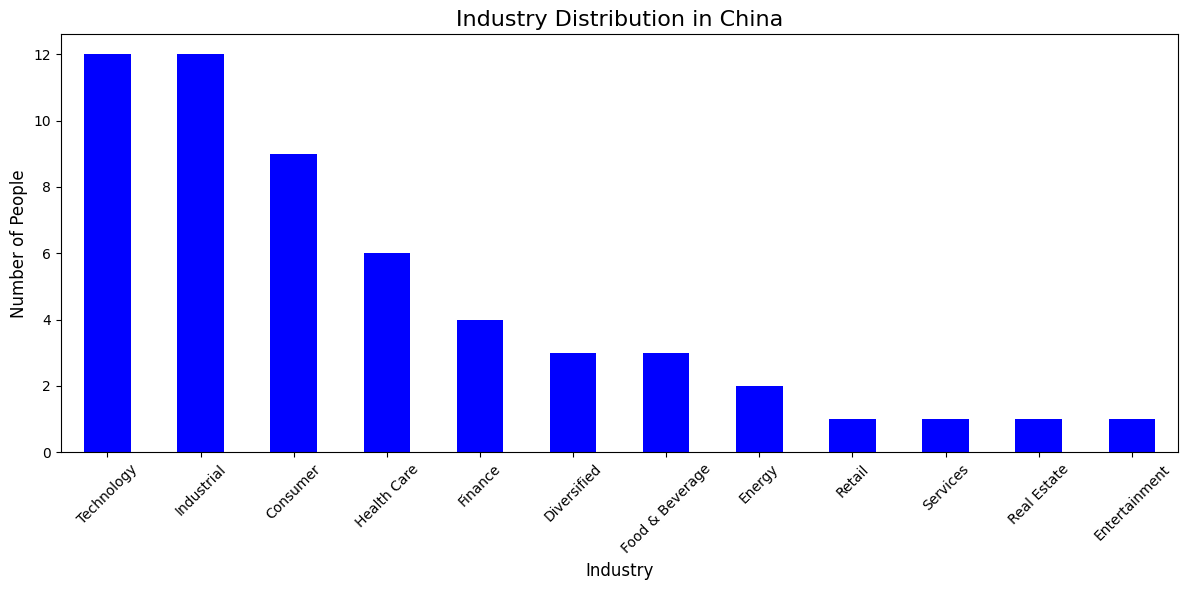

In [62]:
# 筛选特定国家（China）
target_country = "China"
country_data = data[data['Country / Region'] == target_country]

# 按行业统计人数
industry_counts_in_country = country_data['Industry'].value_counts()

# 打印行业分布
print(f"Industry Distribution in {target_country}:")
print(industry_counts_in_country)

# 绘制柱状图
plt.figure(figsize=(12, 6))
industry_counts_in_country.plot(kind='bar', color='blue')
plt.title(f"Industry Distribution in {target_country}", fontsize=16)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


Top 5 Richest People in China:
              Name  Total net worth
23  Zhong Shanshan             58.8
27      Ma Huateng             48.0
35    Zhang Yiming             43.9
46     Colin Huang             36.4
49         Jack Ma             35.2


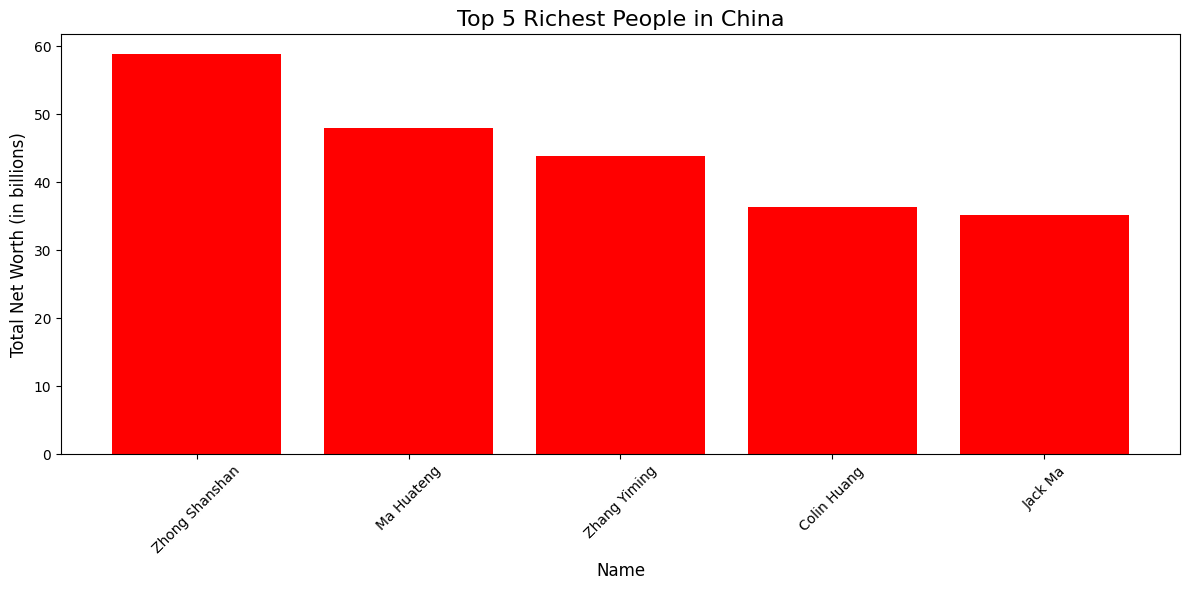

In [64]:
# 筛选特定国家（China）
target_country = "China"
china_data = data[data['Country / Region'] == target_country]

# 提取排名前5的富豪
top_5_china = china_data.nsmallest(5, 'Rank')[['Name', 'Total net worth']]

# 打印前5富豪信息
print(f"Top 5 Richest People in {target_country}:")
print(top_5_china)

# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(top_5_china['Name'], top_5_china['Total net worth'], color='red')
plt.title(f"Top 5 Richest People in {target_country}", fontsize=16)
plt.xlabel("Name", fontsize=12)
plt.ylabel("Total Net Worth (in billions)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
